In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [83]:
conn = sqlite3.connect('data/badania_inz1.db')
query = "SELECT * FROM t_czerwiec"
df_czerwiec = pd.read_sql_query(query,conn)
query = "SELECT * FROM t_lipiec"
df_lipiec = pd.read_sql_query(query,conn)
query = "SELECT * FROM t_dodatkowa"
df_dodatkowa = pd.read_sql_query(query,conn)


C:\Users\CeX\AppData\Local\Temp\ipykernel_11516\2124106935.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


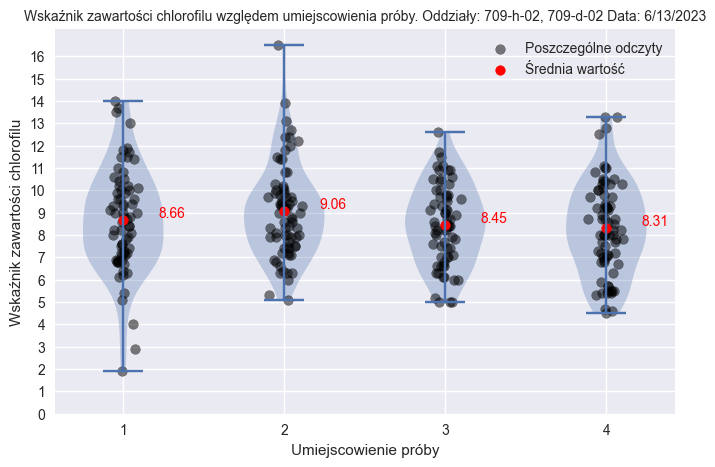

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Grupowanie danych
grouped_data = df_czerwiec.groupby('Umiejscowienie_proby')['Wskaznik_zawartosci_chlorofilu'].apply(list)
data_for_violin = grouped_data.values.tolist()

plt.style.use('seaborn')
plt.figure(figsize=(8, 5))
plt.violinplot(data_for_violin)
plt.xlabel('Umiejscowienie próby')
plt.ylabel('Wskaźnik zawartości chlorofilu')
plt.title('Wskaźnik zawartości chlorofilu względem umiejscowienia próby. Oddziały: 709-h-02, 709-d-02 Data: 6/13/2023', fontsize=10)

for i, data in enumerate(data_for_violin, start=1):
    positions = np.random.normal(i, 0.04, size=len(data))  
    plt.scatter(positions, data, alpha=0.5, color='black', label='Poszczególne odczyty' if i == 1 else None)

# Dodaj czerwone punkty oznaczające średnią wartość
mean_values = [np.mean(values) for values in data_for_violin]
plt.scatter(np.arange(1, len(grouped_data) + 1), mean_values, marker='o', color='red', label='Średnia wartość')

# Dodaj adnotacje obok punktów oznaczających średnią wartość
for i, mean_value in enumerate(mean_values, start=1):
    plt.text(i + 0.3, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='red')

plt.yticks([i for i in range(0, 17, 1)])
plt.grid(True)
plt.xticks(np.arange(1, len(grouped_data) + 1), grouped_data.index)
plt.legend()
plt.show()


In [86]:
chlorofilPerWilgotnosc = df_czerwiec.groupby('Wilgotnosc_gleby')['Wskaznik_zawartosci_chlorofilu'].apply(list)
print(chlorofilPerWilgotnosc)

Wilgotnosc_gleby
1    [7.3, 6.9, 2.9, 8.2, 9.9, 13.7, 10.1, 9.1, 1.9...
3    [6.4, 9.0, 9.2, 10.2, 9.7, 9.4, 9.9, 8.6, 12.4...
4    [8.0, 7.2, 8.8, 12.2, 9.7, 6.6, 8.0, 7.5, 12.0...
5    [10.0, 10.1, 10.8, 9.3, 11.4, 8.3, 6.3, 7.1, 9...
6    [7.7, 8.4, 9.7, 12.4, 9.4, 6.8, 9.0, 11.5, 12....
8    [10.3, 13.1, 9.5, 7.5, 6.3, 7.9, 7.9, 6.3, 9.3...
Name: Wskaznik_zawartosci_chlorofilu, dtype: object


C:\Users\CeX\AppData\Local\Temp\ipykernel_11516\2696395905.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


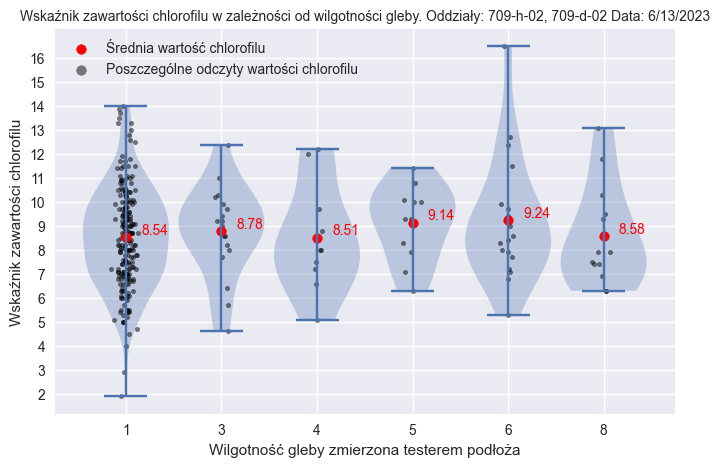

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Twoje dane
data_for_violin = chlorofilPerWilgotnosc.values.tolist()
labels = chlorofilPerWilgotnosc.index.tolist() 

plt.style.use('seaborn')

plt.figure(figsize=(8, 5))
violins = plt.violinplot(data_for_violin, positions=range(1, len(data_for_violin) + 1), widths=0.9)

for i, points in enumerate(data_for_violin):
    y = np.array(points)
    x = np.random.normal(i + 1, 0.05, size=len(points))
    plt.scatter(x, y, color='black', s=10, alpha=0.5)

mean_values = [np.mean(values) for values in data_for_violin]
plt.scatter(range(1, len(mean_values) + 1), mean_values, marker='o', color='red', label='Średnia wartość chlorofilu')

# Dodaj liczbę obok każdej kropki oznaczającej wartość średnią
for i, mean_value in enumerate(mean_values):
    plt.text(i + 1.3, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='red')

plt.xlabel('Wilgotność gleby zmierzona testerem podłoża')
plt.ylabel('Wskaźnik zawartości chlorofilu')
plt.title('Wskaźnik zawartości chlorofilu w zależności od wilgotności gleby. Oddziały: 709-h-02, 709-d-02 Data: 6/13/2023', fontsize=10)

plt.xticks(range(1, len(labels) + 1), labels)
plt.yticks([i for i in range(0, 17, 1)])

plt.grid(True)

plt.scatter([], [], color='black', label='Poszczególne odczyty wartości chlorofilu', alpha=0.5)
plt.legend()

plt.show()


C:\Users\CeX\AppData\Local\Temp\ipykernel_11516\2219628705.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


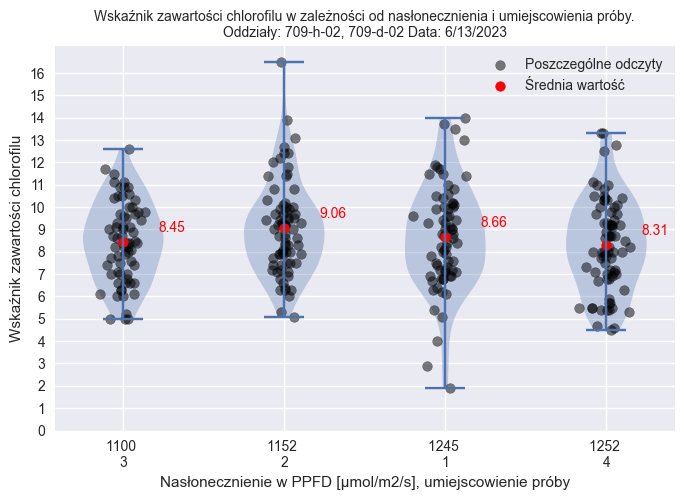

In [88]:
import numpy as np
import matplotlib.pyplot as plt

naslonecznienie_values = sorted(df_czerwiec['Naslonecznienie'].unique())
data = [df_czerwiec[df_czerwiec['Naslonecznienie'] == naslonecznienie]['Wskaznik_zawartosci_chlorofilu'].values 
        for naslonecznienie in naslonecznienie_values]

# Etykiety dla osi x
additional_labels = ["\n3", "\n2", "\n1", "\n4"]

plt.style.use('seaborn')
plt.figure(figsize=(8, 5))

# Rysuj wykresy wiolinowe
violins = plt.violinplot(data)

# Rysuj kropki oznaczające poszczególne odczyty wartości chlorofilu
for i, naslonecznienie in enumerate(naslonecznienie_values):
    values = df_czerwiec[df_czerwiec['Naslonecznienie'] == naslonecznienie]['Wskaznik_zawartosci_chlorofilu']
    x = np.full(len(values), i + 1) + np.random.normal(0, 0.05, len(values))  
    plt.scatter(x, values, color='black', alpha=0.5, label='Poszczególne odczyty' if i == 1 else None)

# Rysuj kropki ze średnią wartością chlorofilu
mean_values = df_czerwiec.groupby('Naslonecznienie')['Wskaznik_zawartosci_chlorofilu'].mean()
plt.scatter(range(1, len(naslonecznienie_values) + 1), mean_values.values, marker='o', color='red', label='Średnia wartość')

# Dodaj adnotacje obok kropek oznaczających średnią wartość
for i, mean_value in enumerate(mean_values):
    plt.annotate(f'{mean_value:.2f}', (i + 1.3, mean_value), textcoords="offset points", xytext=(0, 5), ha='center', va='bottom', color='red')

# Dodaj dodatkowe etykiety do osi x
plt.xticks(range(1, len(naslonecznienie_values) + 1), [f"{value} {label}" for value, label in zip(naslonecznienie_values, additional_labels)])
plt.yticks([i for i in range(0, 17, 1)])
plt.xlabel('Nasłonecznienie w PPFD [µmol/m2/s], umiejscowienie próby')
plt.ylabel('Wskaźnik zawartości chlorofilu')
plt.title('Wskaźnik zawartości chlorofilu w zależności od nasłonecznienia i umiejscowienia próby.\nOddziały: 709-h-02, 709-d-02 Data: 6/13/2023', fontsize=10)

plt.legend()
plt.grid(True)
plt.show()
